### Read cleaned file

In [45]:
import numpy as np
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans, AffinityPropagation
from scipy.stats import mode
import time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import optuna
from sklearn.model_selection import train_test_split


In [46]:
# Specify the path to your CSV file
file_path = 'preprocesseddata.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Now, you have your CSV data in a DataFrame 'df'
df

,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,main_category,sub_category,year,month,day,weekday,timing
0,view,1004741,2053013555631882655,electronics.smartphone,xiaomi,13.782960,560357322,fe9dfa6b-9370-45e4-8480-995473e91b1e,electronics,smartphone,2019,10,25,4,early morning
1,view,12500227,2053013556277805513,electronics.smartphone,makita,8.489405,530873608,044a0dd2-3a47-4a7c-bf57-a873d190dfd6,electronics,smartphone,2019,10,9,2,midnight
2,view,5100816,2053013553375346967,electronics.smartphone,xiaomi,5.436911,548502025,e5309517-4158-4312-abf2-e8780879f336,electronics,smartphone,2019,10,2,2,early morning
3,view,1004653,2053013555631882655,electronics.smartphone,samsung,25.225186,554347151,0191fc4e-9840-4158-96d8-65ef2b328332,electronics,smartphone,2019,10,13,6,night
4,view,3700926,2053013565983425517,appliances.environment.vacuum,samsung,8.001250,555140963,d4d2d6d5-3060-4aea-b895-21716e53781f,appliances,environment.vacuum,2019,10,15,1,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,view,12705188,2053013553559896355,electronics.smartphone,samsung,6.245799,534090743,f1a966bb-883b-44f8-b037-989909594f5f,electronics,smartphone,2019,10,16,2,midnight
49996,view,2601936,2053013563970159485,electronics.smartphone,dauscher,22.109274,518923212,9d8ac2be-1440-4354-b96d-079de06f7d3b,electronics,smartphone,2019,10,27,6,afternoon
49997,view,1004833,2053013555631882655,electronics.smartphone,samsung,13.068665,562836639,c5a79923-57b5-40f5-af5e-10e59a350689,electronics,smartphone,2019,10,24,3,midnight
49998,view,1003311,2053013555631882655,electronics.smartphone,apple,26.552589,517214173,7a19da89-c980-48a4-aae2-7fa9fb745b1a,electronics,smartphone,2019,10,24,3,afternoon


### removing some unwanted features

In [47]:
df = df.drop(['user_session', 'category_code'], axis=1)

In [48]:
df

,event_type,product_id,category_id,brand,price,user_id,main_category,sub_category,year,month,day,weekday,timing
0,view,1004741,2053013555631882655,xiaomi,13.782960,560357322,electronics,smartphone,2019,10,25,4,early morning
1,view,12500227,2053013556277805513,makita,8.489405,530873608,electronics,smartphone,2019,10,9,2,midnight
2,view,5100816,2053013553375346967,xiaomi,5.436911,548502025,electronics,smartphone,2019,10,2,2,early morning
3,view,1004653,2053013555631882655,samsung,25.225186,554347151,electronics,smartphone,2019,10,13,6,night
4,view,3700926,2053013565983425517,samsung,8.001250,555140963,appliances,environment.vacuum,2019,10,15,1,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,view,12705188,2053013553559896355,samsung,6.245799,534090743,electronics,smartphone,2019,10,16,2,midnight
49996,view,2601936,2053013563970159485,dauscher,22.109274,518923212,electronics,smartphone,2019,10,27,6,afternoon
49997,view,1004833,2053013555631882655,samsung,13.068665,562836639,electronics,smartphone,2019,10,24,3,midnight
49998,view,1003311,2053013555631882655,apple,26.552589,517214173,electronics,smartphone,2019,10,24,3,afternoon


### label encoding

In [49]:
catls=['event_type', 'main_category', 'sub_category', 'brand','timing']
encoding_mapping = {}
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through columns and apply label encoding to categorical columns
for column in catls:  # Check if the column is categorical (object type)
        df[column] = label_encoder.fit_transform(df[column])
         # Create mapping for each column
        encoding_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

df

,event_type,product_id,category_id,brand,price,user_id,main_category,sub_category,year,month,day,weekday,timing
0,2,1004741,2053013555631882655,1520,13.782960,560357322,7,97,2019,10,25,4,1
1,2,12500227,2053013556277805513,858,8.489405,530873608,7,97,2019,10,9,2,3
2,2,5100816,2053013553375346967,1520,5.436911,548502025,7,97,2019,10,2,2,1
3,2,1004653,2053013555631882655,1230,25.225186,554347151,7,97,2019,10,13,6,5
4,2,3700926,2053013565983425517,1230,8.001250,555140963,2,42,2019,10,15,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,12705188,2053013553559896355,1230,6.245799,534090743,7,97,2019,10,16,2,3
49996,2,2601936,2053013563970159485,366,22.109274,518923212,7,97,2019,10,27,6,0
49997,2,1004833,2053013555631882655,1230,13.068665,562836639,7,97,2019,10,24,3,3
49998,2,1003311,2053013555631882655,83,26.552589,517214173,7,97,2019,10,24,3,0


### Scaling Features

In [50]:
# Create a StandardScaler instance
#scaler = StandardScaler()
# Create a MinMaxScaler instance
scaler = MinMaxScaler()
# Specify the columns you want to scale
columns_to_scale = ['product_id', 'category_id', 'user_id']

In [51]:

# Fit and transform the specified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [52]:
df

,event_type,product_id,category_id,brand,price,user_id,main_category,sub_category,year,month,day,weekday,timing
0,2,0.000064,2.782359e-08,1520,13.782960,0.980327,7,97,2019,10,25,4,1
1,2,0.196572,3.310047e-08,858,8.489405,0.882267,7,97,2019,10,9,2,3
2,2,0.070084,9.388746e-09,1520,5.436911,0.940898,7,97,2019,10,2,2,1
3,2,0.000063,2.782359e-08,1230,25.225186,0.960338,7,97,2019,10,13,6,5
4,2,0.046154,1.123908e-07,1230,8.001250,0.962978,2,42,2019,10,15,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0.200075,1.089643e-08,1230,6.245799,0.892967,7,97,2019,10,16,2,3
49996,2,0.027367,9.594340e-08,366,22.109274,0.842521,7,97,2019,10,27,6,0
49997,2,0.000066,2.782359e-08,1230,13.068665,0.988573,7,97,2019,10,24,3,3
49998,2,0.000040,2.782359e-08,83,26.552589,0.836837,7,97,2019,10,24,3,0


### PCA

In [53]:
pca = PCA()
pca.fit(df) 
pca.explained_variance_ratio_

array([9.95568037e-01, 3.85834126e-03, 3.20780402e-04, 2.08249912e-04,
       1.65091084e-05, 1.62343553e-05, 1.11564173e-05, 4.33038800e-07,
       1.83889721e-07, 5.80156620e-08, 1.63383013e-08, 5.62602687e-40,
       4.05444539e-42])

In [54]:
pca = PCA(n_components = 2)
pca.fit(df)
pca.components_

array([[-4.97207609e-06, -4.98200794e-05, -1.27329328e-05,
        -9.99982450e-01,  4.10976443e-03, -1.88389352e-06,
        -3.29169398e-04, -4.24198128e-03,  0.00000000e+00,
         0.00000000e+00, -3.16817137e-04,  2.16925294e-05,
         5.24915084e-05],
       [ 3.49066709e-04, -2.53220820e-04, -5.84239142e-05,
         4.07614109e-03, -4.14911039e-02, -9.05280574e-05,
        -2.47312749e-02, -9.98813605e-01, -0.00000000e+00,
        -0.00000000e+00, -4.59670454e-03,  2.11137767e-04,
         4.97955021e-04]])

In [55]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns,
              index = ['Component 1', 'Component 2'])
df_pca_comp

,event_type,product_id,category_id,brand,price,user_id,main_category,sub_category,year,month,day,weekday,timing
Component 1,-0.000005,-0.000050,-0.000013,-0.999982,0.004110,-0.000002,-0.000329,-0.004242,0.0,0.0,-0.000317,0.000022,0.000052
Component 2,0.000349,-0.000253,-0.000058,0.004076,-0.041491,-0.000091,-0.024731,-0.998814,-0.0,-0.0,-0.004597,0.000211,0.000498


In [56]:
pca.transform(df)
scores_pca = pca.transform(df)
scores_pca

array([[-637.70248176,  -14.13394095],
       [  24.2692661 ,  -16.53863088],
       [-637.72954206,  -13.68236637],
       ...,
       [-347.71010668,  -15.28100422],
       [ 799.32502232,  -20.51728109],
       [-637.66865772,  -14.33372582]])

### Kmeans

##### ELBOW METHOD

In [57]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

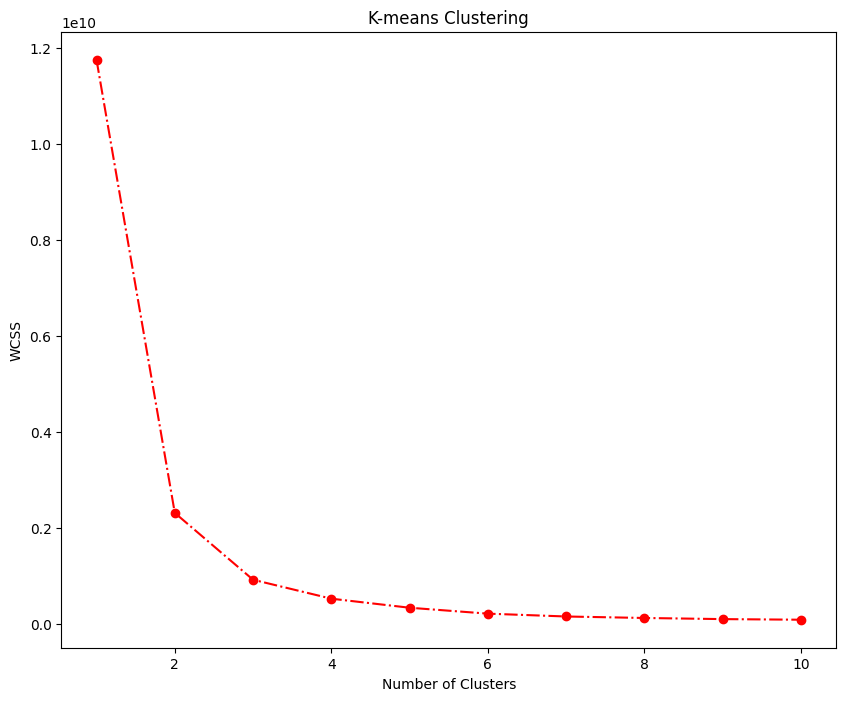

In [58]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [59]:
# Initialize and fit K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit_predict(scores_pca)
df_kmeans= df.copy()
df_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_kmeans.columns.values[-2: ] = ['Component 1', 'Component 2']
df_kmeans['Segment K-means'] = kmeans.labels_
df_kmeans

C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,event_type,product_id,category_id,brand,price,user_id,main_category,sub_category,year,month,day,weekday,timing,Component 1,Component 2,Segment K-means
0,2,0.000064,2.782359e-08,1520,13.782960,0.980327,7,97,2019,10,25,4,1,-637.702482,-14.133941,0
1,2,0.196572,3.310047e-08,858,8.489405,0.882267,7,97,2019,10,9,2,3,24.269266,-16.538631,0
2,2,0.070084,9.388746e-09,1520,5.436911,0.940898,7,97,2019,10,2,2,1,-637.729542,-13.682366,0
3,2,0.000063,2.782359e-08,1230,25.225186,0.960338,7,97,2019,10,13,6,5,-347.656491,-15.733196,0
4,2,0.046154,1.123908e-07,1230,8.001250,0.962978,2,42,2019,10,15,1,4,-347.493120,40.029090,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0.200075,1.089643e-08,1230,6.245799,0.892967,7,97,2019,10,16,2,3,-347.735644,-14.961395,0
49996,2,0.027367,9.594340e-08,366,22.109274,0.842521,7,97,2019,10,27,6,0,516.310841,-19.192539,1
49997,2,0.000066,2.782359e-08,1230,13.068665,0.988573,7,97,2019,10,24,3,3,-347.710107,-15.281004,0
49998,2,0.000040,2.782359e-08,83,26.552589,0.836837,7,97,2019,10,24,3,0,799.325022,-20.517281,1


In [60]:
df_segm_analysis = df_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,event_type,product_id,category_id,brand,price,user_id,main_category,sub_category,year,month,day,weekday,timing,Component 1,Component 2
Segment K-means,,,,,,,,,,,,,,,
0,1.939052,0.186843,0.042357,1219.324190,12.978402,0.891966,6.037395,82.221200,2019.0,10.0,16.205915,2.940078,2.095203,-336.969436,-0.500401
1,1.937690,0.123069,0.023084,322.813015,15.860617,0.889825,5.754749,77.118236,2019.0,10.0,15.924174,2.960783,2.144362,559.559686,0.830949


In [61]:
df_segm_analysis.rename({0:'highly profitable',
                         1:'less profitable',
                        })

,event_type,product_id,category_id,brand,price,user_id,main_category,sub_category,year,month,day,weekday,timing,Component 1,Component 2
Segment K-means,,,,,,,,,,,,,,,
highly profitable,1.939052,0.186843,0.042357,1219.324190,12.978402,0.891966,6.037395,82.221200,2019.0,10.0,16.205915,2.940078,2.095203,-336.969436,-0.500401
less profitable,1.937690,0.123069,0.023084,322.813015,15.860617,0.889825,5.754749,77.118236,2019.0,10.0,15.924174,2.960783,2.144362,559.559686,0.830949


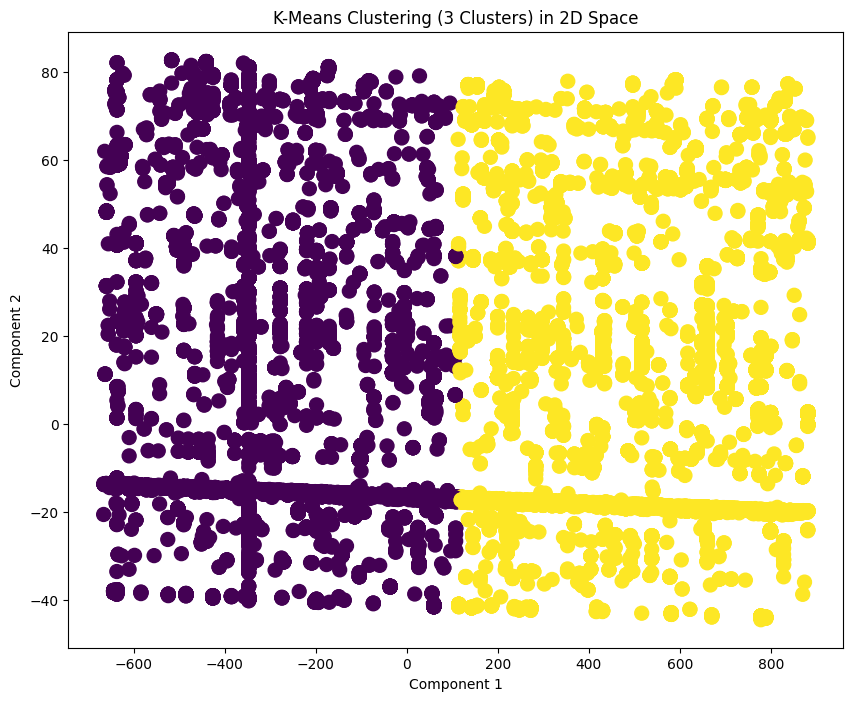

In [62]:
import matplotlib.pyplot as plt

# Create a 2D Scatter Plot
plt.figure(figsize=(10, 8))

x = df_kmeans['Component 1']
y = df_kmeans['Component 2']
c = df_kmeans['Segment K-means']

plt.scatter(x, y, c=c, cmap='viridis', s=100, marker='o')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K-Means Clustering (3 Clusters) in 2D Space')

plt.show()

In [63]:
sil=[]
dbin=[]
labels = kmeans.labels_  # Cluster labels
silhouette_avg = silhouette_score(scores_pca, labels)
db_index = davies_bouldin_score(scores_pca, labels)
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", db_index)
sil.append(silhouette_avg)
dbin.append(db_index)

Silhouette Score: 0.6981058198047612
Davies-Bouldin Index: 0.40763403812857774


### Gaussian Mixture Clustering

In [64]:
# Initialize Gaussian Mixture Model with specified parameters
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
# Fit the model and get cluster labels
df_kmeans['segment gaussian'] = gmm.fit_predict(scores_pca)

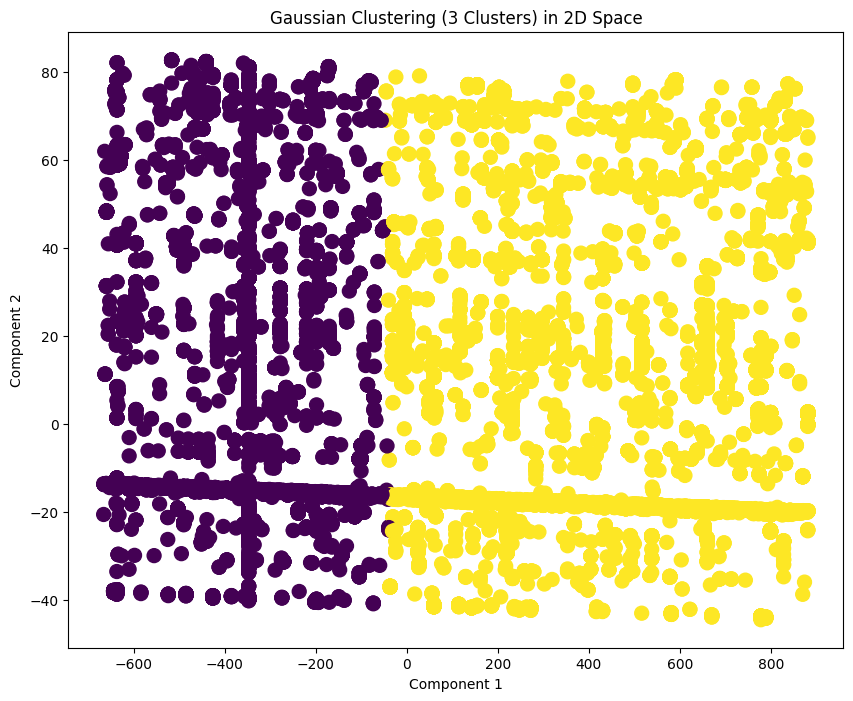

In [65]:
import matplotlib.pyplot as plt

# Create a 2D Scatter Plot
plt.figure(figsize=(10, 8))

x = df_kmeans['Component 1']
y = df_kmeans['Component 2']
c = df_kmeans['segment gaussian']

plt.scatter(x, y, c=c, cmap='viridis', s=100, marker='o')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Gaussian Clustering (3 Clusters) in 2D Space')

plt.show()


In [66]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scores_pca, df_kmeans['segment gaussian'])

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scores_pca, df_kmeans['segment gaussian'])

# Print cluster evaluation metrics
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", db_index)
sil.append(silhouette_avg)
dbin.append(db_index)

Silhouette Score: 0.6777575888819963
Davies-Bouldin Index: 0.45241334801177846


In [67]:
df_kmeans

,event_type,product_id,category_id,brand,price,user_id,main_category,sub_category,year,month,day,weekday,timing,Component 1,Component 2,Segment K-means,segment gaussian
0,2,0.000064,2.782359e-08,1520,13.782960,0.980327,7,97,2019,10,25,4,1,-637.702482,-14.133941,0,0
1,2,0.196572,3.310047e-08,858,8.489405,0.882267,7,97,2019,10,9,2,3,24.269266,-16.538631,0,1
2,2,0.070084,9.388746e-09,1520,5.436911,0.940898,7,97,2019,10,2,2,1,-637.729542,-13.682366,0,0
3,2,0.000063,2.782359e-08,1230,25.225186,0.960338,7,97,2019,10,13,6,5,-347.656491,-15.733196,0,0
4,2,0.046154,1.123908e-07,1230,8.001250,0.962978,2,42,2019,10,15,1,4,-347.493120,40.029090,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0.200075,1.089643e-08,1230,6.245799,0.892967,7,97,2019,10,16,2,3,-347.735644,-14.961395,0,0
49996,2,0.027367,9.594340e-08,366,22.109274,0.842521,7,97,2019,10,27,6,0,516.310841,-19.192539,1,1
49997,2,0.000066,2.782359e-08,1230,13.068665,0.988573,7,97,2019,10,24,3,3,-347.710107,-15.281004,0,0
49998,2,0.000040,2.782359e-08,83,26.552589,0.836837,7,97,2019,10,24,3,0,799.325022,-20.517281,1,1


### Auto Encoder Feature extraction (Deep Kmeans)

In [68]:
df

,event_type,product_id,category_id,brand,price,user_id,main_category,sub_category,year,month,day,weekday,timing
0,2,0.000064,2.782359e-08,1520,13.782960,0.980327,7,97,2019,10,25,4,1
1,2,0.196572,3.310047e-08,858,8.489405,0.882267,7,97,2019,10,9,2,3
2,2,0.070084,9.388746e-09,1520,5.436911,0.940898,7,97,2019,10,2,2,1
3,2,0.000063,2.782359e-08,1230,25.225186,0.960338,7,97,2019,10,13,6,5
4,2,0.046154,1.123908e-07,1230,8.001250,0.962978,2,42,2019,10,15,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0.200075,1.089643e-08,1230,6.245799,0.892967,7,97,2019,10,16,2,3
49996,2,0.027367,9.594340e-08,366,22.109274,0.842521,7,97,2019,10,27,6,0
49997,2,0.000066,2.782359e-08,1230,13.068665,0.988573,7,97,2019,10,24,3,3
49998,2,0.000040,2.782359e-08,83,26.552589,0.836837,7,97,2019,10,24,3,0


In [69]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD
import tensorflow as tf 
# Set random seed for TensorFlow
tf.random.set_seed(42)

encoding_dim = 2

input_df = Input(shape=(13,))

# Encoder layers with decreasing number of neurons
x = Dense(11, activation='relu', kernel_initializer='glorot_uniform')(input_df)
x = Dense(9, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(4, activation='relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(encoding_dim, activation='relu', kernel_initializer='glorot_uniform')(x)

# Decoder layers with increasing number of neurons
x = Dense(4, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(9, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(11, activation='relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(13, kernel_initializer='glorot_uniform')(x)

autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [70]:
#X = df[["event_type","main_category","sub_category","price","brand","year","month","day","weekday","timing","user_id","product_id","category_id" ]]
autoencoder.fit(df, df, batch_size = 128, epochs =100,  verbose = 1)
#autoencoder.fit(df, df, epochs=best_epoch, batch_size=best_batch_size, verbose=1)

Epoch 1/100
391/391 [==============================] - 1s 1ms/step - loss: 63976.7773
Epoch 2/100
391/391 [==============================] - 0s 1ms/step - loss: 15097.7842
Epoch 3/100
391/391 [==============================] - 0s 1ms/step - loss: 15094.9580
Epoch 4/100
391/391 [==============================] - 0s 1ms/step - loss: 15090.1250
Epoch 5/100
391/391 [==============================] - 0s 1ms/step - loss: 15091.8965
Epoch 6/100
391/391 [==============================] - 0s 951us/step - loss: 15083.6787
Epoch 7/100
391/391 [==============================] - 0s 994us/step - loss: 15074.7100
Epoch 8/100
391/391 [==============================] - 0s 988us/step - loss: 15073.7139
Epoch 9/100
391/391 [==============================] - 0s 1ms/step - loss: 15073.4951
Epoch 10/100
391/391 [==============================] - 0s 1ms/step - loss: 15065.4160
Epoch 11/100
391/391 [==============================] - 0s 1ms/step - loss: 15057.5449
Epoch 12/100
391/391 [========================

391/391 [==============================] - 1s 2ms/step - loss: 82.3098
Epoch 97/100
391/391 [==============================] - 1s 2ms/step - loss: 82.6071
Epoch 98/100
391/391 [==============================] - 1s 2ms/step - loss: 82.7384
Epoch 99/100
391/391 [==============================] - 1s 2ms/step - loss: 83.8334
Epoch 100/100
391/391 [==============================] - 1s 2ms/step - loss: 81.0308


In [71]:
pred = encoder.predict(df)
pred

1563/1563 [==============================] - 1s 637us/step


array([[ 967.03534, 1863.6293 ],
       [ 750.62683, 1468.8688 ],
       [ 968.679  , 1864.3177 ],
       ...,
       [ 871.88544, 1690.5592 ],
       [ 493.35495, 1005.0472 ],
       [ 966.9574 , 1863.56   ]], dtype=float32)

In [72]:
print(len(pred))
print(len(scores_pca))
print(pred[0])
pd.DataFrame(pred)

50000
50000
[ 967.03534 1863.6293 ]


,0,1
0,967.035339,1863.629272
1,750.626831,1468.868774
2,968.679016,1864.317749
3,871.235535,1690.258423
4,873.865906,1691.307495
...,...,...
49995,872.866943,1690.969849
49996,586.846680,1174.227539
49997,871.885437,1690.559204
49998,493.354950,1005.047180


C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

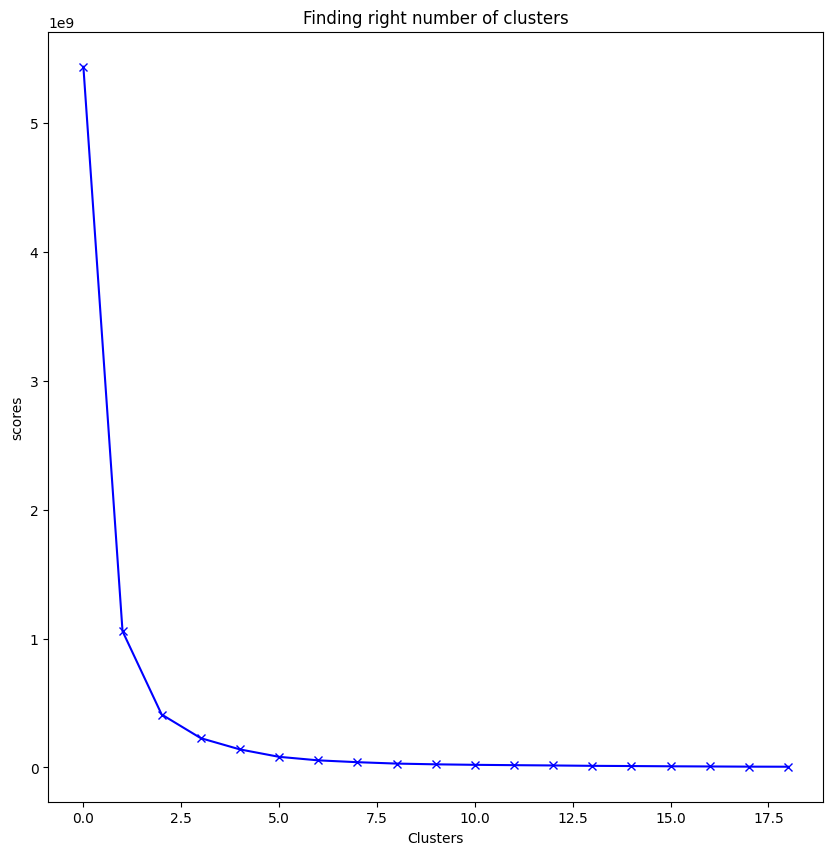

In [73]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)
plt.figure(figsize=(10,10))
plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

In [74]:
# Initialize and fit K-Means with 2 clusters
deepkmeans = KMeans(n_clusters=2, random_state=42)
df_kmeans = pd.concat([df_kmeans.reset_index(drop = True), pd.DataFrame(pred)], axis = 1)
df_kmeans.columns.values[-2: ] = ['auto-Component 1', 'auto-Component 2']
df_kmeans['deep_kmeans'] = deepkmeans.fit_predict(pred)
df_kmeans

C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,event_type,product_id,category_id,brand,price,user_id,main_category,sub_category,year,month,day,weekday,timing,Component 1,Component 2,Segment K-means,segment gaussian,auto-Component 1,auto-Component 2,deep_kmeans
0,2,0.000064,2.782359e-08,1520,13.782960,0.980327,7,97,2019,10,25,4,1,-637.702482,-14.133941,0,0,967.035339,1863.629272,0
1,2,0.196572,3.310047e-08,858,8.489405,0.882267,7,97,2019,10,9,2,3,24.269266,-16.538631,0,1,750.626831,1468.868774,0
2,2,0.070084,9.388746e-09,1520,5.436911,0.940898,7,97,2019,10,2,2,1,-637.729542,-13.682366,0,0,968.679016,1864.317749,0
3,2,0.000063,2.782359e-08,1230,25.225186,0.960338,7,97,2019,10,13,6,5,-347.656491,-15.733196,0,0,871.235535,1690.258423,0
4,2,0.046154,1.123908e-07,1230,8.001250,0.962978,2,42,2019,10,15,1,4,-347.493120,40.029090,0,0,873.865906,1691.307495,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0.200075,1.089643e-08,1230,6.245799,0.892967,7,97,2019,10,16,2,3,-347.735644,-14.961395,0,0,872.866943,1690.969849,0
49996,2,0.027367,9.594340e-08,366,22.109274,0.842521,7,97,2019,10,27,6,0,516.310841,-19.192539,1,1,586.846680,1174.227539,1
49997,2,0.000066,2.782359e-08,1230,13.068665,0.988573,7,97,2019,10,24,3,3,-347.710107,-15.281004,0,0,871.885437,1690.559204,0
49998,2,0.000040,2.782359e-08,83,26.552589,0.836837,7,97,2019,10,24,3,0,799.325022,-20.517281,1,1,493.354950,1005.047180,1


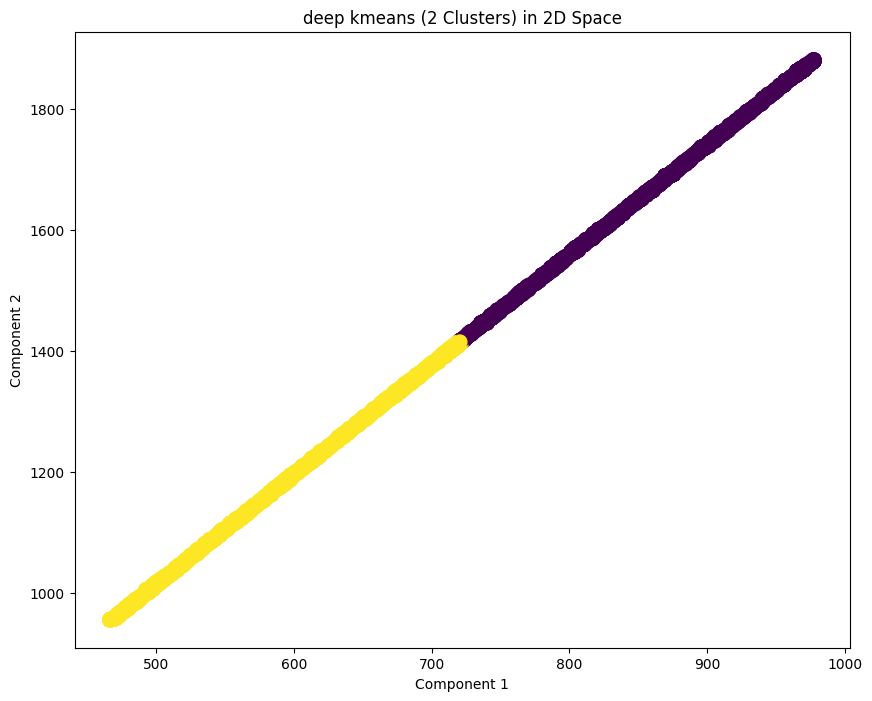

In [75]:
import matplotlib.pyplot as plt

# Create a 2D Scatter Plot
plt.figure(figsize=(10, 8))

x = df_kmeans['auto-Component 1']
y = df_kmeans['auto-Component 2']
c = df_kmeans['deep_kmeans']

plt.scatter(x, y, c=c, cmap='viridis', s=100, marker='o')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('deep kmeans (2 Clusters) in 2D Space')

plt.show()


In [76]:
#intead of x try pred compare with pca
silhouette_avg = silhouette_score(pred, df_kmeans['deep_kmeans'])

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(pred, df_kmeans['deep_kmeans'])

# Print cluster evaluation metrics
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", db_index)
sil.append(silhouette_avg)
dbin.append(db_index)

Silhouette Score: 0.70663255
Davies-Bouldin Index: 0.39491538226918865


### PSO+Kmeans

In [77]:
def optimize_kmeans(centroids, data):
    print(data.shape[1])
    # Assuming centroids is your 1D array of centroids
    num_centroids = len(centroids) // data.shape[1]  # Calculate the number of centroids
    centroids= centroids.reshape(num_centroids,data.shape[1])
    print("cent",centroids)
    kmeans = KMeans(n_clusters=len(centroids), init=np.array(centroids), n_init=1, random_state=0)
    kmeans.fit(data)
    score = kmeans.inertia_  # Use the inertia as the objective to minimize
    return score

In [78]:
from pyswarm import pso


def pso_optimization(data, num_clusters):
    num_samples, num_dimensions = data.shape

    # Set lower and upper bounds for each dimension
    lb = np.min(data, axis=0)
    ub = np.max(data, axis=0)

    # Create bounds for multiple centroids
    lb = np.tile(lb, (num_clusters, 1))
    ub = np.tile(ub, (num_clusters, 1))

    xopt, fopt = pso(optimize_kmeans, lb.flatten(), ub.flatten(), args=(data,), swarmsize=10, maxiter=10)

    return xopt.reshape(num_clusters, num_dimensions)

In [79]:
num_clusters = 2  # You can set the number of clusters you want to find
initial_centroids = pso_optimization(pred, num_clusters)

2
cent [[ 616.13567651 1784.33616735]
 [ 534.32836306 1244.3524422 ]]
2
cent [[ 912.06364756 1699.07346302]
 [ 509.32359487 1060.83727897]]
2
cent [[ 868.94493724 1729.79805862]
 [ 654.87944748 1175.3083873 ]]
2
cent [[ 478.59404806 1349.8224272 ]
 [ 694.16571226 1629.35840839]]
2
cent [[ 883.00410252 1272.50880308]
 [ 511.88187665 1110.25691273]]
2
cent [[ 522.43305431 1061.93792262]
 [ 760.49107669 1822.40105551]]
2
cent [[ 746.43950731 1472.9848937 ]
 [ 856.10506564 1864.57878004]]
2
cent [[ 546.73637001 1574.13008105]
 [ 884.31395963 1436.34900761]]
2
cent [[ 752.86834954 1016.81598836]
 [ 565.39926721 1459.56143598]]
2
cent [[ 649.27565616 1855.83703554]
 [ 612.49205642 1334.98004199]]
2
cent [[ 703.68111086 1705.60512686]
 [ 466.46600342  965.45143542]]
2
cent [[ 754.50105657 1308.98302028]
 [ 466.46600342 1470.52120412]]
2
cent [[ 977.7411499  1492.89618605]
 [ 868.46615858 1109.5504571 ]]
2
cent [[ 466.46600342 1329.52026924]
 [ 466.46600342 1440.74504173]]
2
cent [[ 913.499038

In [80]:
psokmeans = KMeans(n_clusters=num_clusters, init=initial_centroids, n_init=1, random_state=0)
res=psokmeans.fit_predict(pred)

# Get the cluster labels

df_kmeans['pso_kmeans'] = res
silhouette_avg = silhouette_score(pred, df_kmeans['pso_kmeans'])

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(pred, df_kmeans['pso_kmeans'])

# Print cluster evaluation metrics
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", db_index)
sil.append(silhouette_avg)
dbin.append(db_index)

Silhouette Score: 0.70663255
Davies-Bouldin Index: 0.39491538226918865


In [84]:
df_kmeans

,event_type,product_id,category_id,brand,price,user_id,main_category,sub_category,year,month,...,timing,Component 1,Component 2,Segment K-means,segment gaussian,auto-Component 1,auto-Component 2,deep_kmeans,pso_kmeans,Hybrid Cluster
0,2,0.000064,2.782359e-08,1520,13.782960,0.980327,7,97,2019,10,...,1,-637.702482,-14.133941,0,0,967.035339,1863.629272,0,0,1
1,2,0.196572,3.310047e-08,858,8.489405,0.882267,7,97,2019,10,...,3,24.269266,-16.538631,0,1,750.626831,1468.868774,0,0,1
2,2,0.070084,9.388746e-09,1520,5.436911,0.940898,7,97,2019,10,...,1,-637.729542,-13.682366,0,0,968.679016,1864.317749,0,0,1
3,2,0.000063,2.782359e-08,1230,25.225186,0.960338,7,97,2019,10,...,5,-347.656491,-15.733196,0,0,871.235535,1690.258423,0,0,1
4,2,0.046154,1.123908e-07,1230,8.001250,0.962978,2,42,2019,10,...,4,-347.493120,40.029090,0,0,873.865906,1691.307495,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0.200075,1.089643e-08,1230,6.245799,0.892967,7,97,2019,10,...,3,-347.735644,-14.961395,0,0,872.866943,1690.969849,0,0,1
49996,2,0.027367,9.594340e-08,366,22.109274,0.842521,7,97,2019,10,...,0,516.310841,-19.192539,1,1,586.846680,1174.227539,1,1,0
49997,2,0.000066,2.782359e-08,1230,13.068665,0.988573,7,97,2019,10,...,3,-347.710107,-15.281004,0,0,871.885437,1690.559204,0,0,1
49998,2,0.000040,2.782359e-08,83,26.552589,0.836837,7,97,2019,10,...,0,799.325022,-20.517281,1,1,493.354950,1005.047180,1,1,0


### Hybrid Model

In [85]:
#kmeans, kmeans++, minbatch kmeans,affinity propagation,


base_models = [
    KMeans(n_clusters=2, random_state=0),
    KMeans(n_clusters=2, init='k-means++', random_state=0),
    MiniBatchKMeans(n_clusters=2, random_state=0),
    KMeans(n_clusters=num_clusters, init=initial_centroids, n_init=1, random_state=0)   
]
cascade_models=[]
predictions=[]
  
def hybridmodel(pred):
    predictions=[]
    for model in base_models:
        pr=model.fit_predict(pred)
        cascade_models.append(model)
        print(str(model)+ "training and prediction done")
        predictions.append(pr)
        print(predictions)
    predictions = np.asarray(predictions)
     # Perform majority voting
    majority_votes = mode( predictions, axis=0).mode.flatten()

    return majority_votes


In [86]:
Clusterno= hybridmodel(pred)
print("final cluster",Clusterno)
df_kmeans['Hybrid Cluster'] = Clusterno
silhouette_avg = silhouette_score(pred, df_kmeans['Hybrid Cluster'])

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(pred, df_kmeans['Hybrid Cluster'])

# Print cluster evaluation metrics
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", db_index)
sil.append(silhouette_avg)
dbin.append(db_index)

C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chun

KMeans(n_clusters=2, random_state=0)training and prediction done
[array([1, 1, 1, ..., 1, 0, 1])]
KMeans(n_clusters=2, random_state=0)training and prediction done
[array([1, 1, 1, ..., 1, 0, 1]), array([1, 1, 1, ..., 1, 0, 1])]
MiniBatchKMeans(n_clusters=2, random_state=0)training and prediction done
[array([1, 1, 1, ..., 1, 0, 1]), array([1, 1, 1, ..., 1, 0, 1]), array([1, 1, 1, ..., 1, 0, 1])]
KMeans(init=array([[ 486.50764975, 1609.96300969],
       [ 577.28682202, 1214.50888935]]),
       n_clusters=2, n_init=1, random_state=0)training and prediction done
[array([1, 1, 1, ..., 1, 0, 1]), array([1, 1, 1, ..., 1, 0, 1]), array([1, 1, 1, ..., 1, 0, 1]), array([0, 0, 0, ..., 0, 1, 0])]


C:\Users\Dedu\AppData\Local\Temp\ipykernel_19876\1638864747.py:23: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_votes = mode( predictions, axis=0).mode.flatten()


final cluster [1 1 1 ... 1 0 1]
Silhouette Score: 0.70663065
Davies-Bouldin Index: 0.39494302251878194


### Comparison of different clustering techniques

In [90]:
sil

[0.6981058198047612, 0.6777575888819963, 0.70663255, 0.70663255, 0.70663065]

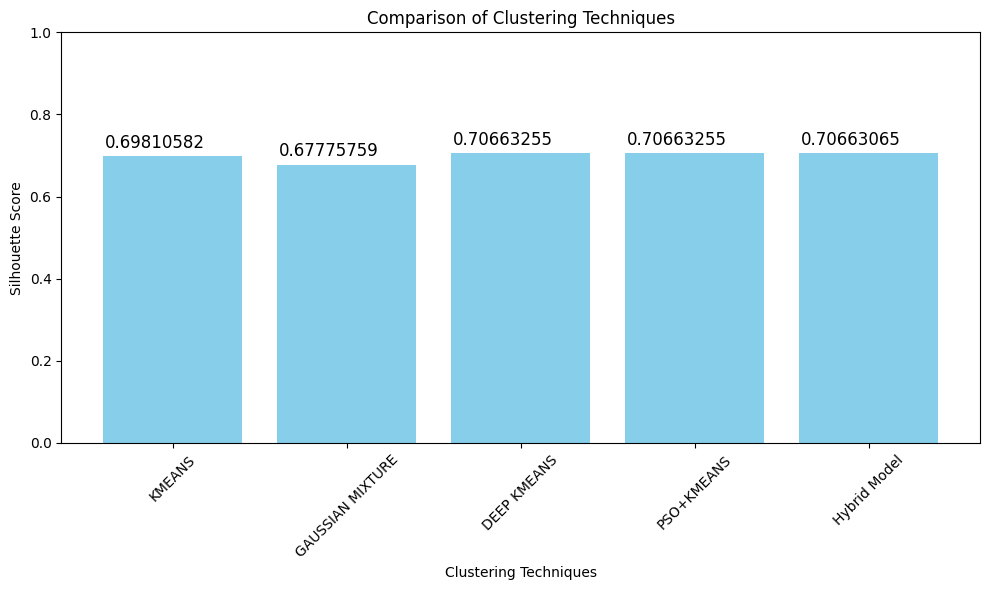

In [91]:
import matplotlib.pyplot as plt

# List of clustering techniques
clusterstech = ["KMEANS", "GAUSSIAN MIXTURE", "DEEP KMEANS","PSO+KMEANS","Hybrid Model"]

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
bars = plt.bar(clusterstech, sil, color='skyblue')
plt.xlabel('Clustering Techniques')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Clustering Techniques')
plt.ylim(0, 1)  # Set the y-axis limits (adjust as needed)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Add values above each bar
for bar, score in zip(bars, sil):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{score:.8f}', ha='center', color='black', fontsize=12)

plt.tight_layout()  # Ensure labels are not cut off
plt.show()

### preparing post processing file

In [92]:
for i in df_kmeans.columns:
    print(i)

event_type
product_id
category_id
brand
price
user_id
main_category
sub_category
year
month
day
weekday
timing
Component 1
Component 2
Segment K-means
segment gaussian
auto-Component 1
auto-Component 2
deep_kmeans
pso_kmeans
Hybrid Cluster


In [93]:
#df_cluster = df_kmeans.iloc[:, :12]
# Select the first 12 columns and the 14th column
df_cluster= df_kmeans.iloc[:, list(range(13)) + [19]].copy()
df_cluster

,event_type,product_id,category_id,brand,price,user_id,main_category,sub_category,year,month,day,weekday,timing,deep_kmeans
0,2,0.000064,2.782359e-08,1520,13.782960,0.980327,7,97,2019,10,25,4,1,0
1,2,0.196572,3.310047e-08,858,8.489405,0.882267,7,97,2019,10,9,2,3,0
2,2,0.070084,9.388746e-09,1520,5.436911,0.940898,7,97,2019,10,2,2,1,0
3,2,0.000063,2.782359e-08,1230,25.225186,0.960338,7,97,2019,10,13,6,5,0
4,2,0.046154,1.123908e-07,1230,8.001250,0.962978,2,42,2019,10,15,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0.200075,1.089643e-08,1230,6.245799,0.892967,7,97,2019,10,16,2,3,0
49996,2,0.027367,9.594340e-08,366,22.109274,0.842521,7,97,2019,10,27,6,0,1
49997,2,0.000066,2.782359e-08,1230,13.068665,0.988573,7,97,2019,10,24,3,3,0
49998,2,0.000040,2.782359e-08,83,26.552589,0.836837,7,97,2019,10,24,3,0,1


In [94]:
encoding_mapping

{'event_type': {'cart': 0, 'purchase': 1, 'view': 2},
 'main_category': {'accessories': 0,
  'apparel': 1,
  'appliances': 2,
  'auto': 3,
  'computers': 4,
  'construction': 5,
  'country_yard': 6,
  'electronics': 7,
  'furniture': 8,
  'kids': 9,
  'medicine': 10,
  'sport': 11,
  'stationery': 12},
 'sub_category': {'accessories.alarm': 0,
  'accessories.compressor': 1,
  'accessories.parktronic': 2,
  'accessories.player': 3,
  'accessories.radar': 4,
  'accessories.videoregister': 5,
  'accessories.winch': 6,
  'audio.acoustic': 7,
  'audio.headphone': 8,
  'audio.microphone': 9,
  'audio.music_tools.piano': 10,
  'audio.subwoofer': 11,
  'bag': 12,
  'bathroom.bath': 13,
  'bathroom.toilet': 14,
  'bedroom.bed': 15,
  'bedroom.blanket': 16,
  'bedroom.pillow': 17,
  'belt': 18,
  'bicycle': 19,
  'camera.photo': 20,
  'camera.video': 21,
  'carriage': 22,
  'cartrige': 23,
  'clocks': 24,
  'components.cooler': 25,
  'components.cpu': 26,
  'components.faucet': 27,
  'components

In [95]:

# Inverse transform using the mapping
for column, column_mapping in encoding_mapping.items():
    
    df_cluster[column] = df_cluster[column].map({v: k for k, v in column_mapping.items()})
    #print(column, df_cluster[column])
    


df_cluster

,event_type,product_id,category_id,brand,price,user_id,main_category,sub_category,year,month,day,weekday,timing,deep_kmeans
0,view,0.000064,2.782359e-08,xiaomi,13.782960,0.980327,electronics,smartphone,2019,10,25,4,early morning,0
1,view,0.196572,3.310047e-08,makita,8.489405,0.882267,electronics,smartphone,2019,10,9,2,midnight,0
2,view,0.070084,9.388746e-09,xiaomi,5.436911,0.940898,electronics,smartphone,2019,10,2,2,early morning,0
3,view,0.000063,2.782359e-08,samsung,25.225186,0.960338,electronics,smartphone,2019,10,13,6,night,0
4,view,0.046154,1.123908e-07,samsung,8.001250,0.962978,appliances,environment.vacuum,2019,10,15,1,morning,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,view,0.200075,1.089643e-08,samsung,6.245799,0.892967,electronics,smartphone,2019,10,16,2,midnight,0
49996,view,0.027367,9.594340e-08,dauscher,22.109274,0.842521,electronics,smartphone,2019,10,27,6,afternoon,1
49997,view,0.000066,2.782359e-08,samsung,13.068665,0.988573,electronics,smartphone,2019,10,24,3,midnight,0
49998,view,0.000040,2.782359e-08,apple,26.552589,0.836837,electronics,smartphone,2019,10,24,3,afternoon,1


In [96]:
df_cluster.to_csv('df_cluster.csv', index=False)

### seperating clusters

In [97]:
df_kmeans

,event_type,product_id,category_id,brand,price,user_id,main_category,sub_category,year,month,...,timing,Component 1,Component 2,Segment K-means,segment gaussian,auto-Component 1,auto-Component 2,deep_kmeans,pso_kmeans,Hybrid Cluster
0,2,0.000064,2.782359e-08,1520,13.782960,0.980327,7,97,2019,10,...,1,-637.702482,-14.133941,0,0,967.035339,1863.629272,0,0,1
1,2,0.196572,3.310047e-08,858,8.489405,0.882267,7,97,2019,10,...,3,24.269266,-16.538631,0,1,750.626831,1468.868774,0,0,1
2,2,0.070084,9.388746e-09,1520,5.436911,0.940898,7,97,2019,10,...,1,-637.729542,-13.682366,0,0,968.679016,1864.317749,0,0,1
3,2,0.000063,2.782359e-08,1230,25.225186,0.960338,7,97,2019,10,...,5,-347.656491,-15.733196,0,0,871.235535,1690.258423,0,0,1
4,2,0.046154,1.123908e-07,1230,8.001250,0.962978,2,42,2019,10,...,4,-347.493120,40.029090,0,0,873.865906,1691.307495,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0.200075,1.089643e-08,1230,6.245799,0.892967,7,97,2019,10,...,3,-347.735644,-14.961395,0,0,872.866943,1690.969849,0,0,1
49996,2,0.027367,9.594340e-08,366,22.109274,0.842521,7,97,2019,10,...,0,516.310841,-19.192539,1,1,586.846680,1174.227539,1,1,0
49997,2,0.000066,2.782359e-08,1230,13.068665,0.988573,7,97,2019,10,...,3,-347.710107,-15.281004,0,0,871.885437,1690.559204,0,0,1
49998,2,0.000040,2.782359e-08,83,26.552589,0.836837,7,97,2019,10,...,0,799.325022,-20.517281,1,1,493.354950,1005.047180,1,1,0


In [98]:
# Creating two DataFrames based on the column value
df_cluster_1 = df_kmeans[ df_kmeans['deep_kmeans'] == 1].iloc[:, :12]
df_cluster_0 =  df_kmeans[df_kmeans['deep_kmeans'] == 0].iloc[:, :12]


In [99]:
df_cluster_1

,event_type,product_id,category_id,brand,price,user_id,main_category,sub_category,year,month,day,weekday
5,2,0.000056,2.782359e-08,83,26.713293,0.864543,7,97,2019,10,27,6
7,2,0.064996,1.987399e-08,619,5.045790,0.824089,7,8,2019,10,1,1
10,2,0.027364,9.594340e-08,496,13.613596,0.958291,7,97,2019,10,3,3
11,2,0.418967,8.189454e-08,559,6.744627,0.887663,7,97,2019,10,9,2
12,2,0.000040,2.782359e-08,83,26.769385,0.979759,7,97,2019,10,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49986,2,0.000056,2.782359e-08,83,28.275608,0.932134,7,97,2019,10,26,5
49988,2,0.049565,8.223715e-10,96,14.205281,0.822098,2,43,2019,10,25,4
49990,2,0.290610,5.146678e-08,0,2.022375,0.915260,7,97,2019,10,14,0
49996,2,0.027367,9.594340e-08,366,22.109274,0.842521,7,97,2019,10,27,6


In [100]:
df_cluster_0

,event_type,product_id,category_id,brand,price,user_id,main_category,sub_category,year,month,day,weekday
0,2,0.000064,2.782359e-08,1520,13.782960,0.980327,7,97,2019,10,25,4
1,2,0.196572,3.310047e-08,858,8.489405,0.882267,7,97,2019,10,9,2
2,2,0.070084,9.388746e-09,1520,5.436911,0.940898,7,97,2019,10,2,2
3,2,0.000063,2.782359e-08,1230,25.225186,0.960338,7,97,2019,10,13,6
4,2,0.046154,1.123908e-07,1230,8.001250,0.962978,2,42,2019,10,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,2,0.000067,2.782359e-08,1230,19.459188,0.976431,7,97,2019,10,12,5
49994,2,0.064982,1.987399e-08,1053,2.774887,0.927529,7,8,2019,10,15,1
49995,2,0.200075,1.089643e-08,1230,6.245799,0.892967,7,97,2019,10,16,2
49997,2,0.000066,2.782359e-08,1230,13.068665,0.988573,7,97,2019,10,24,3


In [101]:
# Save each DataFrame to a separate CSV file
df_cluster_0.to_csv('df_cluster_0.csv', index=False)
df_cluster_1.to_csv('df_cluster_1.csv', index=False)